In [1]:
import tensorflow as tf

/home/multi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.12.0'

In [3]:
tf.enable_eager_execution()

In [4]:
import numpy as np
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train[0]

5.0

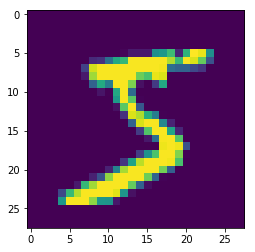

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [9]:
layers = tf.keras.layers

In [10]:
model = tf.keras.models.Sequential()

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(units=512,activation=tf.nn.sigmoid))
model.add(layers.Dense(units=10,activation=tf.nn.softmax))

In [12]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
model.fit(x_train, y_train, batch_size = 32, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3431 - acc: 0.9042
Epoch 2/2
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1747 - acc: 0.9485


In [14]:
model1 = tf.keras.models.Sequential()
model1.add(layers.Flatten())
for i in range(2):
    model1.add(layers.Dense(units=512,activation=tf.nn.sigmoid))
model1.add(layers.Dense(units=10,activation=tf.nn.softmax))

In [15]:
model1.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
model1.fit(x_train, y_train, batch_size = 32, epochs=2)


Epoch 1/2
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3440 - acc: 0.8969
Epoch 2/2
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1438 - acc: 0.9570


In [17]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step


[0.14615759369283915, 0.9573]

In [18]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  401920    
_________________________________________________________________
dense_3 (Dense)              multiple                  262656    
_________________________________________________________________
dense_4 (Dense)              multiple                  5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [19]:
x_train.shape

(60000, 28, 28)

In [28]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [29]:
train_ds = train_ds.shuffle(buffer_size=10000)
train_ds = train_ds.batch(batch_size=8)


In [30]:
optimizer = tf.train.AdamOptimizer()

In [31]:
for i, (images, lables) in enumerate(train_ds):
    #print(lables)
    #print(images)
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = tf.losses.sparse_softmax_cross_entropy(lables,predictions)
    
    gradients = tape.gradient(loss,model.variables)
    optimizer.apply_gradients(zip(gradients, model.variables))
    
    #print("step: {}, loss : {}".format(i+1 , loss))
    
    

In [39]:
accuracy = tf.contrib.eager.metrics.Accuracy()
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.batch(batch_size=10000)

In [40]:
for images, lables in test_ds:
    predictions = model(images)
    accuracy(lables, tf.dtypes.cast(tf.argmax(predictions,1),tf.int32))

In [41]:
print(accuracy.result())

tf.Tensor(0.9577, shape=(), dtype=float64)
